# Programming Assignment II: Explainability

In this assignment you will train machine learning models and experiment with techniques discussed in the lectures.
This assignment makes use of existing Python libraries for some questions. We have provided links to tutorials/examples if you're not familiar with them yet.

All code that you implement should be in this notebook. You should submit:
* This notebook with your code added. Make sure to add enough documentation. Also provide complete answers to the more theoretical questions in this notebook. These questions are followed by an 'answer indent':
> Answer:

The notebook .ipynb should have the name format `Prog_Explainability_Group_X.ipynb`, where X is your programming group ID.

Important notes:
* Deadline for this assignment is **Monday, June 3, 17:00**.
* Send it to both Mart Koek (m.j.koek@uu.nl) and Heysem Kaya (h.kaya@uu.nl), CCing your programming partner.
* Title of the email: [INFOMHCML] Explainability programming assignment submission X, with X the number of your group.
* There will be a lab session to assist you with the assignment on **Thursday, May 30, between 13:15-15:00 at DALTON 500 - 6.27 and DALTON 500 - 7.27**.

### Installation

For this assignment, we are going to use the following Python packages:
graphviz, matplotlib, pandas, statsmodels, openpyxl, interpret, and scikit-learn.

In [1]:
# Installing packages
"""
!pip install graphviz
!pip install matplotlib pandas statsmodels openpyxl
!pip install interpret
!pip install scikit-learn --upgrade
"""

'\n!pip install graphviz\n!pip install matplotlib pandas statsmodels openpyxl\n!pip install interpret\n!pip install scikit-learn --upgrade\n'

### Read the data
We are going to use the ChaLearn LAP-FI (First Impressions) Dataset. This dataset contains 10.000 data points, which correspond to videos collected from YouTube and annotated via Amazon Mechanical Turk for the BIG-5 personality impressions: openness, extraversion, conscientiousness, neuroticism, agreeableness.

These five personality impression scores will be used as features to predict the outcome variable: a job interview invitation.

For a detailed description, see the [paper of the dataset](https://ieeexplore.ieee.org/abstract/document/7966041?casa_token=1Y03H5ykCqsAAAAA:VLhCcjAgByJ2hTdKhulmIUiXIVepEJfFyB7HM0XVts7bN8Gi8wMsiTT0qZ--I_kq8wiUHIpPN7es).


1.   If you use Google Colab, upload 'all_df.csv' (you can find this file on blackboard) through the upload button in the Files tab.
  - Copy the path of the file;
  - Run the cell below with your path. This will ask you for permission to access your Google Drive files and then you can access the data.
2.   If you are running this notebook at your own machine (jupyter notebook), locate the 'all_df.csv' file in the same folder this notebook exists. Then you can run the second cell below.

   



In [2]:
# Run this cell (both when working locally or with Google Colab)
import pandas as pd

data = pd.read_csv("all_df.csv")
print("Data loaded")

Data loaded


### Loading and preprocessing the data
There are 6000, 2000 and 2000 examples for training, validation/development and test set respectively. In the data this is indicated by the feature `split`.

The training set is used to train models, the validation/development set to optimize the models hyper-parameters, and the test set to evaluate the trained model.

In [3]:
import numpy as np

# global variables
FEATURE_NAMES = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']
LABEL_NAME = 'interview'

def load_data():
    def split_feature_label(data_set):
        features = data_set[FEATURE_NAMES]
        labels = data_set[LABEL_NAME]
        return features, labels

    train_set = data[data['split'] == 'training']
    val_set = data[data['split'] == 'validation']
    test_set = data[data['split'] == 'test']

    train_features, train_labels = split_feature_label(train_set)
    val_features, val_labels = split_feature_label(val_set)
    test_features, test_labels = split_feature_label(test_set)

    return train_features, train_labels, val_features, \
        val_labels, test_features, test_labels

# Load the data with the function above
(train_features, train_labels, dev_features, \
        dev_labels, test_features, test_labels) = load_data()

# Part 1. Different models

### **1. Linear Regression**

Train a linear regression model (we recommend the `statsmodels.api` package with the ordinary least squares model `sm`).

Hint: to get a linear regression model, you should manually add a constant variable (usually called bias or intercept - that has a fixed value of 1 for all instances) to the data, either by adding it column yourself or by using the `add_constant()` function.



**Q1.1**

Provide the $R^2$ (goodness of fit) statistic and for each feature (+ the bias variable), the following in tabular format:
* Weight estimate (coef)
* SE (standard error of estimates)
* T-statistic

Hint: You can print the summary of the model using `.summary()` to do this. This gives an extensive overview of the performance of a model.

In [4]:
# We recommend the statsmodels package
import statsmodels.api as sm

# Your code to add a bias/intercept variable

train_features['intercept'] = 1
dev_features['intercept'] = 1
test_features['intercept'] = 1

model = sm.OLS(train_labels, train_features)
result = model.fit()

summary_frame = result.summary2().tables[1]
r_squared = result.rsquared
statistics_table = summary_frame[['Coef.', 'Std.Err.', 't']]

statistics_table = statistics_table.copy()
print(f'R-squared: {r_squared}')
print(statistics_table)
print(statistics_table["Coef."]/statistics_table["Std.Err."])

R-squared: 0.9142184410829707
                      Coef.  Std.Err.          t
extraversion       0.189129  0.007017  26.954426
neuroticism        0.239739  0.007730  31.012534
agreeableness      0.257324  0.006712  38.337366
conscientiousness  0.329254  0.005494  59.925864
openness           0.085708  0.006721  12.753101
intercept         -0.072713  0.002592 -28.052175
extraversion         26.954426
neuroticism          31.012534
agreeableness        38.337366
conscientiousness    59.925864
openness             12.753101
intercept           -28.052175
dtype: float64


**Q1.2**

Which three features are the most important?

> Answer: The top 3 features are conscientiousness, agreeableness, and neuroticism. We can use the t-statistics, the ratio of the coefficient to its standard error, to determine feature importance. 

**Q1.3**

How does the predicted 'interview' score change with an 0.1 increase of the 'conscientiousness' feature given that all other feature values remain the same?

> Answer:
The interview score is calculated as the sum of each sub-score multiplied by its coefficient. An increase of 0.1 in the conscientiousness score, would result in a 0.329254*0.1 ≈ 0.033 change in the final interview score, 0.329254 being the coefficient of the conscientiousness score. 

**Q1.4**

Show bar graph illustrations of the feature effects for the first two validation set instances.


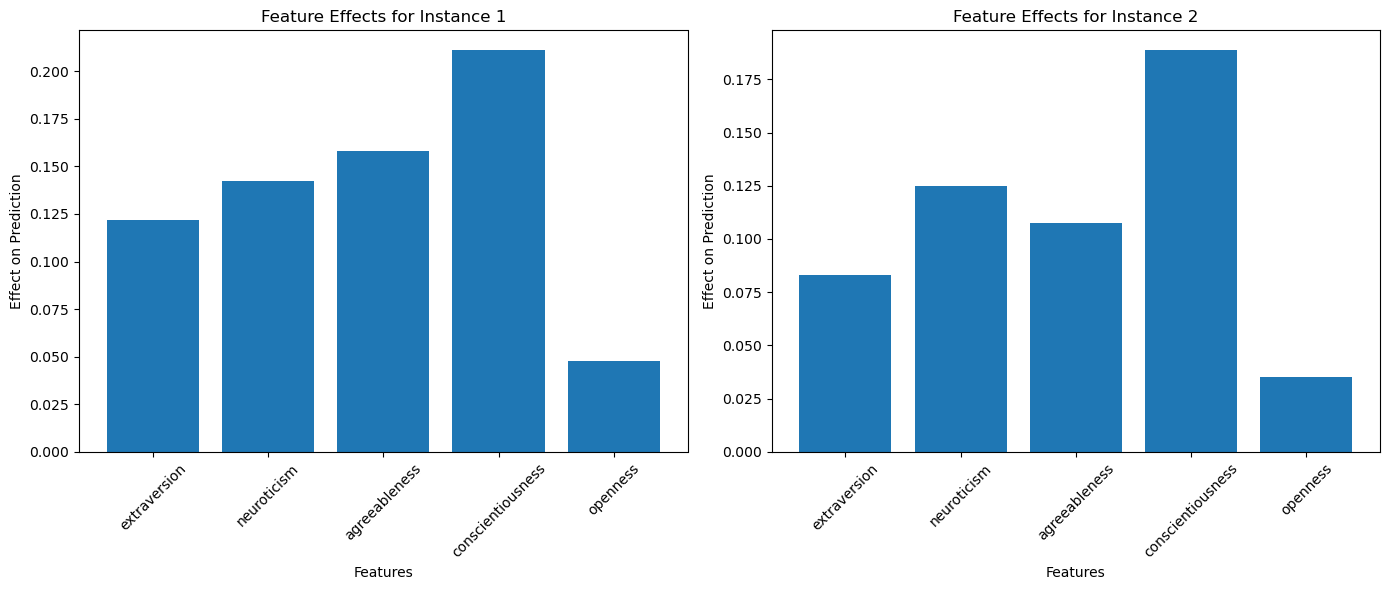

In [5]:
import matplotlib.pyplot as plt
# Compute the Feature Effects

coefficients = result.params[:-1]

instance1 = dev_features.iloc[0][:-1]
instance2 = dev_features.iloc[1][:-1]

feature_effects1 = coefficients * instance1
feature_effects2 = coefficients * instance2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(feature_effects1.index, feature_effects1.values)
axes[0].set_title('Feature Effects for Instance 1')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Effect on Prediction')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(feature_effects2.index, feature_effects2.values)
axes[1].set_title('Feature Effects for Instance 2')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Effect on Prediction')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Q1.5**

Reflection: why would training a regression tree not work well for this dataset in terms of model interpretability? And under what conditions could the dataset be used with a decision tree to yield an interpretable model?

There are several reasons a regression tree may not be the best approach for this dataset. 
1) The results from the linear regression are relatively strong, and the coefficients for each feature are quite high, indicating strong linear relationships. Since a decision tree creates splits (to minimize cross entropy) at each level of the tree, linear relations are captured poorly. Final scores would be captured in "buckets".  At low tree depth, this would result in a very crude and low-performing model, at high depth, the decision tree would lose interpretability. 
2) The dataset is highly regular, with consistent datatypes at consistent scales (between 0 and 1). Unlike categorical data, there are infinitesimally many possible splits.  We are not taking advantage of the decision tree's ability to split along categorical boundaries.  


If the dataset had more categorical data say instead of a score for each value, we use qualifiers such as high, low, and medium for a feature such as neuroticism. This would yield a tree that remains interpretable, and depending on how we set the qualifiers, relatively performant. 

### **2. Explainable Boosting Model**
Train an Explainable Boosting Machine (EBM) with [InterpretML](https://interpret.ml/docs/ebm.html). EBM is a Generalized Additive Model (GAM) that is highly intelligible and explainable.

The `interpret` package provides both global and local explanation functions: `explain_global()` and `explain_local()` can be used to interpret a ML model.

**Q2.1**

Visualize/provide global (model-wise) feature importances for EBM as a table or figure.

In [6]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

train_features2 = train_features.copy()
train_features2 = train_features2.drop(columns=['intercept'])

ebm = ExplainableBoostingRegressor()
ebm.fit(train_features2, train_labels)

ExplainableBoostingRegressor()

In [7]:
from sklearn.metrics import root_mean_squared_error

test_features2 = test_features.drop(columns=['intercept'])

pred = ebm.predict(test_features2)

print(test_features2)
score = root_mean_squared_error(test_labels,pred)
print("R3: {:.3f}".format(score))

# EBM Global feature importances
show(ebm.explain_global())

      extraversion  neuroticism  agreeableness  conscientiousness  openness
8000      0.485981     0.645833       0.681319           0.669903  0.822222
8001      0.616822     0.593750       0.692308           0.514563  0.655556
8002      0.467290     0.625000       0.560440           0.524272  0.522222
8003      0.411215     0.458333       0.714286           0.660194  0.400000
8004      0.317757     0.437500       0.384615           0.524272  0.411111
...            ...          ...            ...                ...       ...
9995      0.289720     0.312500       0.208791           0.135922  0.300000
9996      0.719626     0.781250       0.670330           0.572816  0.722222
9997      0.355140     0.395833       0.472527           0.446602  0.677778
9998      0.467290     0.645833       0.527473           0.669903  0.622222
9999      0.654206     0.635417       0.813187           0.728155  0.588889

[2000 rows x 5 columns]
R3: 0.045


<!-- http://127.0.0.1:7001/2083624527440/ -->

**Q2.2**

What are the most important two features in EBM? Are they the same as in the linear model?

> Answer:  The two most important features are conscientiousness, with a mean absolute weighted score of 0.041, and neuroticism with a mean absolute weighted score of 0.029. Compared to the linear model, the importance of neuroticism and agreeableness are switched, in both models they are similar but the linear model consistently rates agreeableness higher than the EBM. Both rate conscientiousness as the most important feature, by far, compared to the other features. 

Now, to have an idea how EBM treats the input and generates the explanation, visualize EBM local explanations on a synthetic instance generated from training set mean feature vector as input and training set mean response as output.



In [8]:
# EBM Local explanation for training set mean vector with corresponding training set mean label
train_mean_x = pd.DataFrame(train_features2.mean(axis=0)).T
train_mean_y = pd.DataFrame([train_labels.mean()])

print(train_mean_x)
show(ebm.explain_local(train_mean_x, train_mean_y), 0)


   extraversion  neuroticism  agreeableness  conscientiousness  openness
0      0.476146     0.520286       0.548181           0.522731  0.566281


<!-- http://127.0.0.1:7001/2083638104912/ -->

**Q2.3**

Now, visualize local (instance-wise) feature importances for the first two instances of the development set.

In [9]:
# EBM local explanations for the first two development set instances
dev_features2 = dev_features.copy()
dev_features2 = dev_features2.drop(columns=["intercept"])
instance1 = list(dev_features2.iloc[0])
instance2 = list(dev_features2.iloc[1])

print(dev_labels.iloc[0])
show(ebm.explain_local([instance1,instance2], dev_labels[:2]),0)

0.616822429906542


<!-- http://127.0.0.1:7001/2083638357712/ -->

**Q2.4**

Let's compare these feature importances with the feature effects in question 1.4.

* Are the feature contribution orderings the same in both models for the two instances?
> Answer: No, the feature ordering varies considerably. In the first instance, we see from the largest to smallest contribution conscientiousness, extraversion, agreeableness, neuroticism, and openness, while in the second instance, it is agreeableness, openness, conscientiousness extraversion, and neuroticism. 




* For the second example's explanation, why do you think the contribution of *conscientiousness* is positive, while the contribution of *agreeableness* is negative? (Hint: consider the feature values relative to the training set mean values you calculated / processed in the former subquestion.)
> Answer: In the second instance conscientiousness has above above-average rating, and the features of agreeableness, openness, and extraversion are considerably below the average values for the data-set. The local explanation contains information on which factors contribute how strongly to a deviation away from the intercept value. The first instance has above-average composite scores and final scores for both ground truth and prediction, so all composite scores contribute positively. This is not the case in the second instance, all composite scores except for conscientiousness are below average, so they contribute negatively to the outcome. They push the estimated score below the intercept, while the conscientiousness being above average pushes against the negative influence of the other scores.  

# Part 2. Model-Agnostic Methods for Interpreting/Explaining NN

### **3. Training Neural Networks**
Train a one-layer Neural Network (multi-layer perceptron (MLP) Regressor, but with one layer) with the following settings:

- Activation function: ReLU
- Size of the hidden layer: 50 neurons
- Recommended optimizer/solver: Adam

For a tutorial see [Tutorial](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

**Q3.1**

Apply the trained neural network model to the development set to find the best hyperparameters (such as learning rate). Report the Root Mean Square Error (RMSE) performance measure.

**Note.** A development set RMSE below 0.045 is reasonable, then you can apply the corresponding model on the test set in the next question.

In [20]:
#reinitializing data-set
(train_features, train_labels, dev_features, \
        dev_labels, test_features, test_labels) = load_data()

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error
import itertools
from tqdm import tqdm

# Train the MLPRegressor and show RMSE on development set

lr_mode = ['constant', 'invscaling', 'adaptive']
betas1 = np.linspace(0.8, 0.99, 8)
betas2 = np.linspace(0.8, 0.999, 8)
lrs = np.logspace(-4, -1, 4)
best_rmse = float('inf')
best_lr_mode = None
best_lr = None

for lr_mode, lr, beta1, beta2 in tqdm(list(itertools.product(*[lr_mode, lrs, betas1, betas2]))):
    model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=1000, 
                         learning_rate=lr_mode, learning_rate_init=lr, beta_1=beta1, beta_2=beta2, random_state=42)
    model.fit(train_features, train_labels)
    dev_predictions = model.predict(dev_features)
    rmse = root_mean_squared_error(dev_labels, dev_predictions)
    if rmse < best_rmse:
        best_rmse = rmse
        best_lr_mode = lr_mode
        best_lr = lr

print(f'Best RMSE: {best_rmse}, Best learning rate mode: {best_lr_mode}, Best learning rate: {best_lr}, Best beta1: {beta1}, Best beta2: {beta2}')

100%|██████████| 768/768 [13:04<00:00,  1.02s/it]

Best RMSE: 0.042974875727571776, Best learning rate mode: constant, Best learning rate: 0.001, Best beta1: 0.99, Best beta2: 0.999


**Q3.2**

Now use the best settings to report the Root Mean Square Error (RMSE) performance measure on the test set.

It is possible to use the combination of the training and development sets to retrain the model and report the test set performance. You can also use the model that was trained on the training set only.

In [12]:
# RMSE on test set
big_train_features = pd.concat([train_features, dev_features])
big_train_labels = pd.concat([train_labels, dev_labels])
model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=1000, learning_rate=best_lr_mode, learning_rate_init=best_lr, beta_1=beta1, beta_2=beta2, random_state=42)
model.fit(big_train_features, big_train_labels)
test_predictions = model.predict(test_features)
test_rmse = root_mean_squared_error(test_labels, test_predictions)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.04520703473627932


Now we can analyze factors that influence the predictions. Both Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) plots can be used to visualize and analyze interaction between the target response and a set of input features of interest.

See the [Documentation](https://scikit-learn.org/stable/modules/partial_dependence.html) on how to use PDPs and ICEs.

**Q3.3**

Generate univariate and bivariate PDPs for the `conscientiousness` and `agreeableness` features with the neural network you trained above.

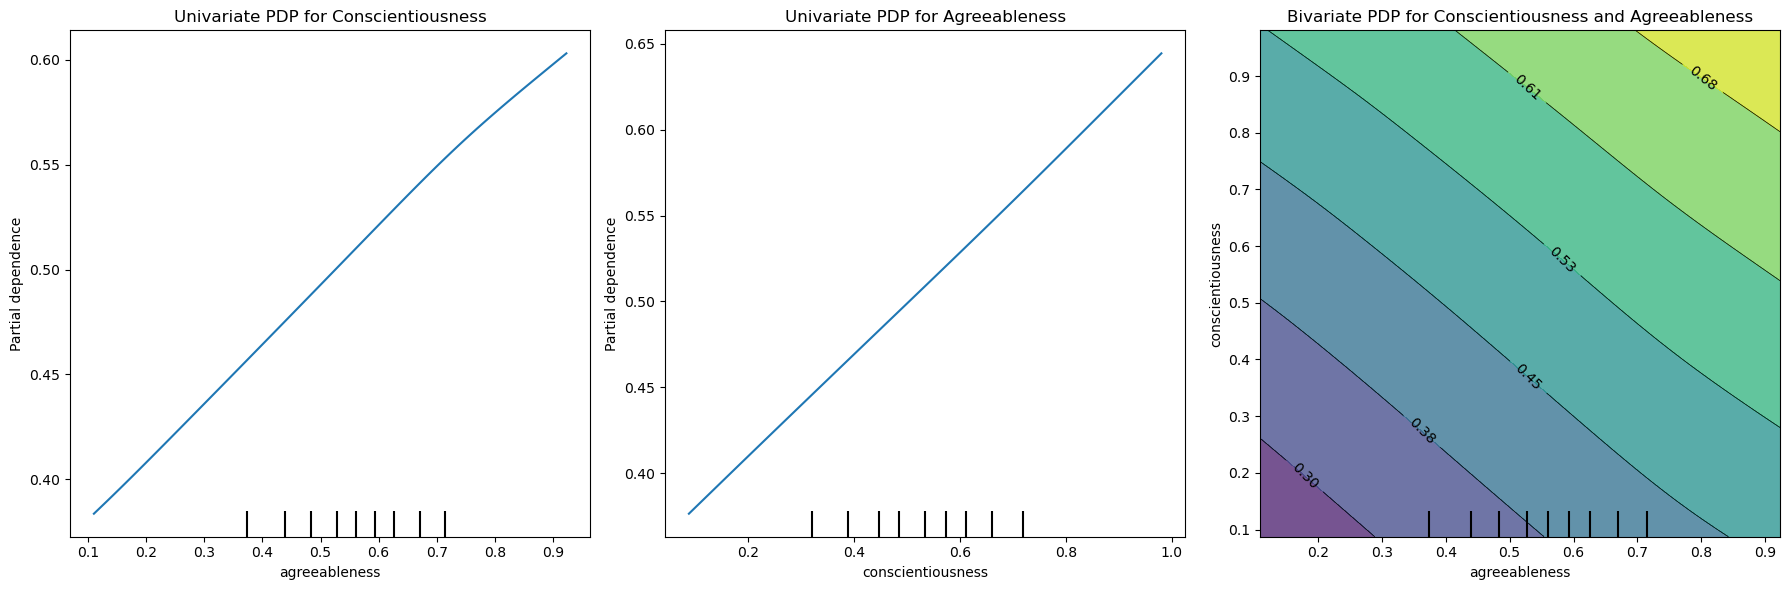

In [13]:
from sklearn.inspection import PartialDependenceDisplay

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
display1 = PartialDependenceDisplay.from_estimator(model, test_features, [2], ax=ax1)
ax1.set_title('Univariate PDP for Conscientiousness')

display2 = PartialDependenceDisplay.from_estimator(model, test_features, [3], ax=ax2)
ax2.set_title('Univariate PDP for Agreeableness')

display3 = PartialDependenceDisplay.from_estimator(model, test_features, [(2, 3)], ax=ax3)
ax3.set_title('Bivariate PDP for Conscientiousness and Agreeableness')

plt.tight_layout()
plt.show()
# PDPs

**Q3.4**

What do these plots show?

> Answer: We can see that an increase in both 'agreeableness' and 'conscientiousness' positively contributes to the resulting score. In the bivariate plot, we see that 'conscientiousness' has a stronger contribution towards the final precision than agreeableness (hence the lines we observe are slanted rather than symmetrical)


**Q3.5**

Now generate ICE plots for each feature.

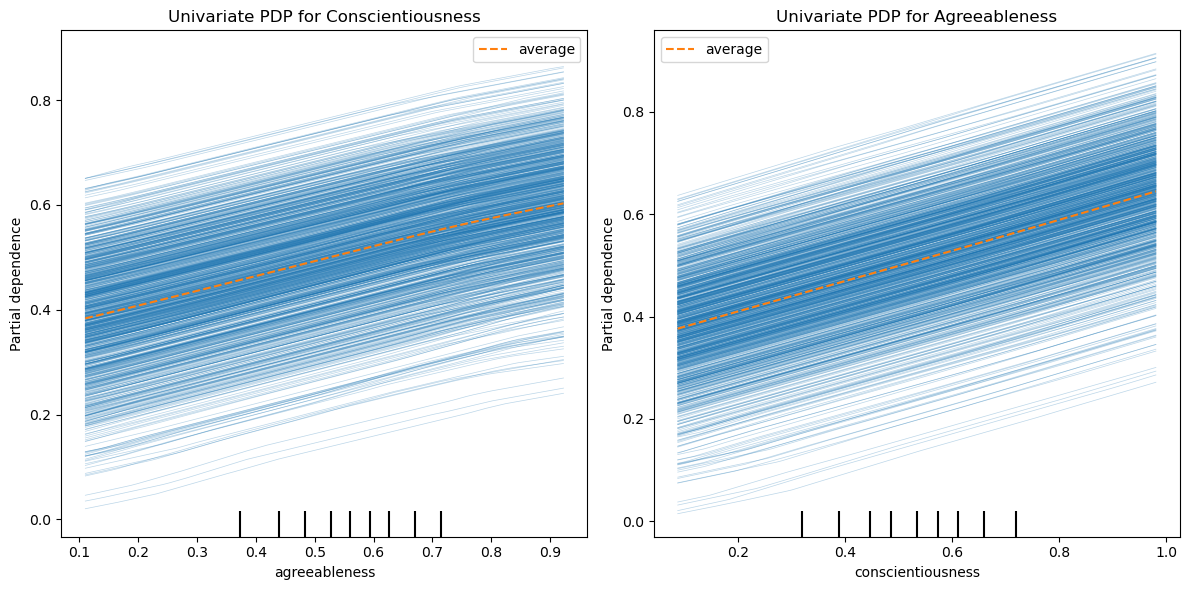

In [14]:
# ICEs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
display1 = PartialDependenceDisplay.from_estimator(model, test_features, [2], ax=ax1, kind='both')
ax1.set_title('Univariate PDP for Conscientiousness')

display2 = PartialDependenceDisplay.from_estimator(model, test_features, [3], ax=ax2, kind='both')
ax2.set_title('Univariate PDP for Agreeableness')

plt.tight_layout()
plt.show()

**Q3.6**

What can you conclude from ICE plots above?

> Answer: The general mechanism of contribution and dependence remains consistent. Each increase of either agreeableness or conscientiousness contributes positively to the final score and remains consistent. Moreover, we can see similar slopes in contribution across the considerable range of samples, this indicates that the relationship between these composite scores and the final score is fairly linear. We can also see that there is considerable variance of partial dependence, but the slope of contribution as the score increases remains consistent.

**Q3.7**

Implement the PDF (Partial Dependence Function) for univariate analysis of the trained NN model.


In [15]:
def PDF(X, model, feature):
  """
  Input   Dataset 'X', Model 'model', feature_name 'feature'
  Output  x_values: independent variable values
          f_values: corresponding output per x value
  """
  # Note: uncomment the lines below and complete the right hand side (where you see '..' to set them to suitable values, respective explanations are provided for each variable
  num_samples = len(X)  # set the number of samples/steps to slice the range of the continuous feature, e.g., 100.
  min_val = min(X[feature])      # minimum value of the given feature
  max_val = max(X[feature])      # maximum value of the given feature
  step_size = (max_val - min_val) / (num_samples - 1)   # see the algorithm in corresponsing lecture slides to calculate the step size as a function of the above variables
  x_values = np.linspace(min_val, max_val, num_samples)    # x_values at which we will calculate the partial function of the given feature
  f_values = np.zeros(num_samples)    # the calculated partial function values corresponding to x_values

  for k in range(num_samples):
        X_temp = X.copy()
        X_temp[feature] = x_values[k]
        f_values[k] = model.predict(X_temp).mean()
    
  return x_values, f_values

**Q3.8**

Calculate and visualize the feature importances obtained by your PDF algorithm with a bar graph. How do we calculate the feature importance given the x_values and y_values of the PDF algorithm?

In [21]:
# First calculate the x_values and f_values for each feature
x_v = dict()
f_v = dict()
ftrs = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']
for feature in ftrs:
    x_values, f_values = PDF(test_features, model, feature)
    x_v[feature] = x_values
    f_v[feature] = f_values

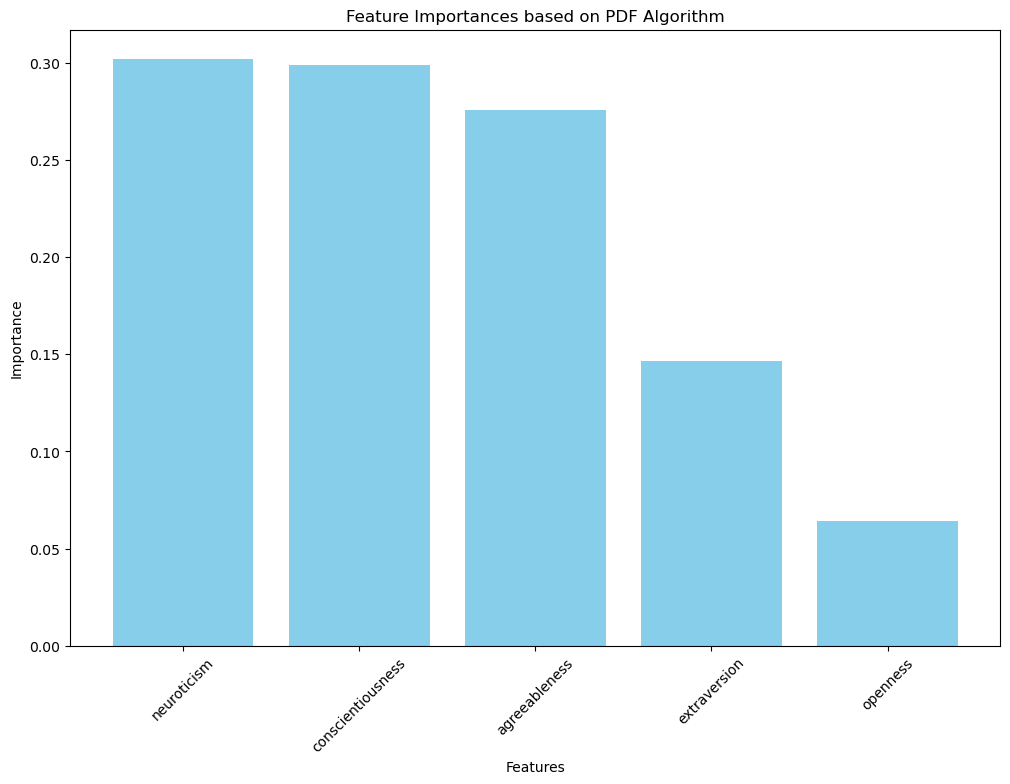

In [22]:
from scipy.stats import linregress

# Fit a linear model per feature, what is the output of this linear model?
feature_importances = dict()

for feature in ftrs:
    x_values, f_values = x_v[feature], f_v[feature]

    slope, intercept, r_value, p_value, std_err = linregress(x_values, f_values)
    
    # Store the absolute value of the slope as the feature importance
    feature_importances[feature] = abs(slope)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances with a bar graph
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances based on PDF Algorithm')
plt.xticks(rotation=45)
plt.show()

**Q3.9**

What are the two most important features obtained by the PDF algorithm for the MLP model? How do these two features compare to the top two features from the Linear Model and the EBM?

> Answer: Neuroticism and Conscientiousness rank highest. This is considerably different from the Linear Model and the EBM which mark conscientiousness considerably higher than neuroticism. 


### **4. Permutation Feature Importance**

**Q4.1**

Implement the permutation feature importance algorithm using RMSE as the error function. No existing libraries (barring the RMSE from `sklearn` and a function for random sampling / permutation) are allowed to be used, you will implement it yourself with the framework below.

In [18]:
def PFI(X, labels, model, base_rmse):
  results = []
  for feature in X:
    #print(feature)
    # Create a copy of X_test
    test_x = X.copy()
    # Scramble the values of the given predictor (feature)
    test_x[feature]=np.random.permutation(test_x[feature])
    
    # Calculate the new RMSE
    pred = model.predict(test_x)

    error = root_mean_squared_error(labels,pred)
    dif = abs(base_rmse-error)
    # Append the increase in MSE to the list of results
    results.append({"feature":feature, "score":dif})
    
  df = pd.DataFrame(results,columns=["feature","score"])
  # Put the results into a pandas dataframe and rank the predictors by score
  df['rank'] = df['score'].rank()
  # return results_df
  return df
res = PFI(test_features, test_labels, ebm, score)
print(res)

             feature     score  rank
0       extraversion  0.013016   2.0
1        neuroticism  0.022750   4.0
2      agreeableness  0.020679   3.0
3  conscientiousness  0.041437   5.0
4           openness  0.004161   1.0


**Q4.2**

Visualize the feature importances obtained by your PFI algorithm with a bar graph.

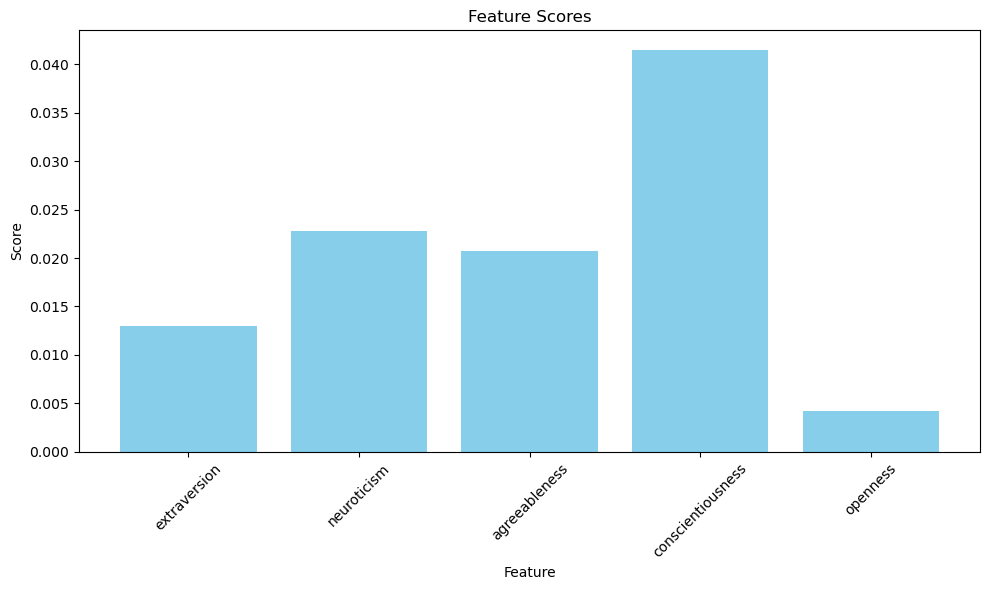

In [19]:
# Bar graph of feature importances
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(res['feature'], res['score'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q4.3**

What are the two most important features obtained by the permutation feature importance algorithm for the PFI model? How do these two features compare to the top two features from the Linear Model and the EBM?

> Answer: Conscientiousness and Neuroticism rank highest for the PFI model, with agreeableness ranking similarly to neuroticism. This matches the ranking produced by the EBM. 


**Q4.4**

Explain two disadvantages of the PFI method.

> Answer: 
1) If features are correlated, PFI is likely to produce unrealistic instances that may not occur in the wild. Say openness and extraversion are highly correlated, i.e. an individual with high openness will also have high extraversion (this is for illustrative purposes), PFI may produce an instance with low extraversion but high openness which is not realistic. (This may be more obvious for obviously related features such as weight and height, a very tall person will not have the weight of an infant)
2) If the features are correlated, feature importance may be split between the two features. 
3) While the model does not have to be retrained, the variance will likely be very high between single permuted instances (this is why we repeat it several times), and this might inflict additional computation costs. We also need to be able to access the ground truth, of a non-permuted instance. 